<a href="https://colab.research.google.com/github/maryamarief96/CE888/blob/master/DS_65_35.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE



/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
df=pd.read_csv("https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.csv", delimiter = ",",names=['f1', 'f2', 'f3', 'f4', 'f5','f6','f7','f8','class']
)

In [3]:
df['class'].value_counts()


0    500
1    268
Name: class, dtype: int64

In [5]:
df.head()

,f1,f2,f3,f4,f5,f6,f7,f8,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [0]:
features=['f1',	'f2',	'f3',	'f4',	'f5',	'f6',	'f7',	'f8']

In [0]:
outcomes_of_interest=['class']

In [0]:
counts=df['class'].value_counts()

In [9]:
if counts[0]>counts[1]:
  percent_imbalance=counts[0]/(counts[0]+counts[1])

else:
  percent_imbalance=counts[1]/(counts[0]+counts[1])

print("percent imbalance: "+ str(round(percent_imbalance*100)) +"%")

percent imbalance: 65.0%


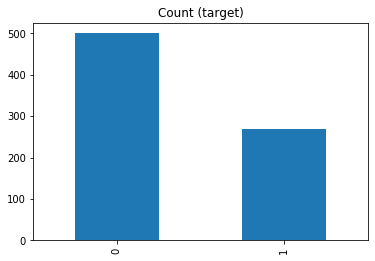

In [10]:
counts.plot(kind='bar', title='Count (target)');

In [4]:

# Will drop all features with missing values 
df.dropna(inplace = True)
df.isnull().sum()

f1       0
f2       0
f3       0
f4       0
f5       0
f6       0
f7       0
f8       0
class    0
dtype: int64

In [0]:
# Visulazing the distibution of the data for every feature
sns.set(font_scale=1.5)
df.hist(edgecolor='black', linewidth=1.2, figsize=(20, 20));

In [0]:
plt.figure(figsize=(20, 20))
sns.heatmap(df.corr(), annot=True, cmap="RdYlGn", annot_kws={"size":15})

In [0]:
from sklearn.impute import SimpleImputer

fill_values = SimpleImputer(missing_values=0, strategy="mean", copy=False)

df[features] = fill_values.fit_transform(df[features])

In [18]:
for column in features:
    print("============================================")
    print(f"{column} ==> Missing zeros : {len(df.loc[df[column] == 0])}")

f1 ==> Missing zeros : 0
f2 ==> Missing zeros : 0
f3 ==> Missing zeros : 0
f4 ==> Missing zeros : 0
f5 ==> Missing zeros : 0
f6 ==> Missing zeros : 0
f7 ==> Missing zeros : 0
f8 ==> Missing zeros : 0


In [0]:
X_df = df[features].copy()
y_df = df[outcomes_of_interest].copy()

In [0]:
X_train,X_test,y_train,y_test = train_test_split(X_df, y_df, random_state=0, stratify=y_df, shuffle=True)

In [29]:
sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_res, y_train_res = sm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [0]:
y_train_res

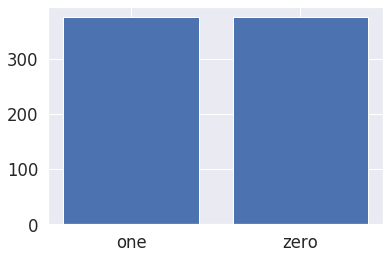

In [34]:
one=np.count_nonzero(y_train_res == 1)

zero=np.count_nonzero(y_train_res == 0)

height=[one,zero]
bars=['one','zero']
y_pos = np.arange(len(bars))


plt.bar(y_pos, height)
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
 
# Show graphic
plt.show()